WEEK 4 PROJECT

In [1]:
import statsmodels.formula.api as sm
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans



##Data Wrangling, Exploration and Cleaning

In [2]:
df = pd.read_csv('../data/dc_bikes.csv')
df .head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1


Extract new features from a datetime variable

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
df['month']= df['datetime'].dt.month
df['year']= df['datetime'].dt.year
df['hour']= df['datetime'].dt.hour
df['day']= df['datetime'].dt.day

In [5]:
df


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,1,2011,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,1,2011,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,1,2011,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,1,2011,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,12,2012,19,31
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,12,2012,20,31
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,12,2012,21,31
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,12,2012,22,31


Bin data into multiple categories for further analysis

In [6]:
df['hour'].min(), df['hour'].max()

(0, 23)

In [7]:
bin_labels = ['morning','afternoon','evening','night']

In [8]:
bin_boundaries = [0.0,12,17.0,21,23.1]

In [9]:
df['part_of_day'] = pd.cut(df['hour'],bins = bin_boundaries, labels = bin_labels)

In [13]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,1,2011,0,1,NaN
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,2011,1,1,morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,1,2011,2,1,morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,1,2011,3,1,morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,1,2011,4,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,12,2012,19,31,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,12,2012,20,31,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,12,2012,21,31,evening
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,12,2012,22,31,night


Save the new dataset in a csv file

In [ ]:
#Save your new dataset in a csv file (so you can reuse it later on)

#df.to_csv('../data/dc_bikes.csv', index=True)

###Analyze Data

Create a pivot table of traffic density over weekdays and/or hours

In [16]:
df["Hours"] = df["datetime"].dt.hour

In [17]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day,part_of_day,Hours
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,1,2011,0,1,NaN,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,2011,1,1,morning,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,1,2011,2,1,morning,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,1,2011,3,1,morning,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,1,2011,4,1,morning,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,12,2012,19,31,evening,19
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,12,2012,20,31,evening,20
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,12,2012,21,31,evening,21
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,12,2012,22,31,night,22


Prepare a naive forecast of the count of needed bikes

In [18]:
cap = df[(df['month'] ==5) & (df['year'] == 2011)]
cap

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day,part_of_day,Hours
2786,2011-05-01 00:00:00,2,0,0,1,17.22,21.210,67,6.0032,19.0,77.0,96,5,2011,0,1,NaN,0
2787,2011-05-01 01:00:00,2,0,0,1,17.22,21.210,69,7.0015,9.0,50.0,59,5,2011,1,1,morning,1
2788,2011-05-01 02:00:00,2,0,0,1,17.22,21.210,77,7.0015,7.0,43.0,50,5,2011,2,1,morning,2
2789,2011-05-01 03:00:00,2,0,0,1,16.40,20.455,82,7.0015,8.0,15.0,23,5,2011,3,1,morning,3
2790,2011-05-01 04:00:00,2,0,0,1,16.40,20.455,76,7.0015,6.0,11.0,17,5,2011,4,1,morning,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,2011-05-31 19:00:00,2,0,1,1,31.98,37.120,62,7.0015,NaN,NaN,407,5,2011,19,31,evening,19
3526,2011-05-31 20:00:00,2,0,1,1,31.98,37.120,62,7.0015,NaN,NaN,310,5,2011,20,31,evening,20
3527,2011-05-31 21:00:00,2,0,1,1,31.16,36.365,66,7.0015,NaN,NaN,224,5,2011,21,31,evening,21
3528,2011-05-31 22:00:00,2,0,1,1,30.34,34.850,70,11.0014,NaN,NaN,160,5,2011,22,31,night,22


In [19]:
bike = df[(df['month'] ==5) & (df['year'] == 2012)]
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day,part_of_day,Hours
11539,2012-05-01 00:00:00,2,0,1,2,20.50,24.240,59,12.9980,7.0,28.0,35,5,2012,0,1,NaN,0
11540,2012-05-01 01:00:00,2,0,1,2,20.50,24.240,63,8.9981,0.0,21.0,21,5,2012,1,1,morning,1
11541,2012-05-01 02:00:00,2,0,1,2,20.50,24.240,72,6.0032,1.0,7.0,8,5,2012,2,1,morning,2
11542,2012-05-01 03:00:00,2,0,1,2,20.50,24.240,77,0.0000,1.0,2.0,3,5,2012,3,1,morning,3
11543,2012-05-01 04:00:00,2,0,1,2,21.32,25.000,72,6.0032,1.0,7.0,8,5,2012,4,1,morning,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,2012-05-31 19:00:00,2,0,1,1,29.52,32.575,34,11.0014,NaN,NaN,420,5,2012,19,31,evening,19
12279,2012-05-31 20:00:00,2,0,1,1,27.88,31.820,44,11.0014,NaN,NaN,336,5,2012,20,31,evening,20
12280,2012-05-31 21:00:00,2,0,1,1,27.88,31.820,44,11.0014,NaN,NaN,249,5,2012,21,31,evening,21
12281,2012-05-31 22:00:00,2,0,1,1,27.06,31.060,50,11.0014,NaN,NaN,188,5,2012,22,31,night,22


In [20]:
MAE = mean_absolute_error(cap['count'],bike ['count'])
MAE

117.3239247311828

How are the features correlated? 
Calculate correlation between dependent and independent variables.Calculate correlation between dependent and independent variables

In [21]:
rice = df.loc[:, ['temp', 'atemp', 'humidity', 'windspeed', 'count', 'hour']]
rice

,temp,atemp,humidity,windspeed,count,hour
0,9.84,14.395,81,0.0000,16,0
1,9.02,13.635,80,0.0000,40,1
2,9.02,13.635,80,0.0000,32,2
3,9.84,14.395,75,0.0000,13,3
4,9.84,14.395,75,0.0000,1,4
...,...,...,...,...,...,...
17374,10.66,12.880,60,11.0014,156,19
17375,10.66,12.880,60,11.0014,104,20
17376,10.66,12.880,60,11.0014,67,21
17377,10.66,13.635,56,8.9981,43,22


In [22]:
df.corr()

/var/folders/kq/06c2srv963j0pl9s_r6r7_q40000gn/T/ipykernel_29382/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day,Hours
season,1.000000,-0.009585,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.096758,0.164011,0.195452,0.830386,-0.010742,-0.006117,-0.003052,-0.006117
holiday,-0.009585,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.043799,-0.020956,-0.013600,0.018430,0.006692,0.000479,-0.010132,0.000479
workingday,0.013743,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.319111,0.119460,0.004821,-0.003477,-0.002196,0.002285,0.008627,0.002285
weather,-0.014524,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.135918,-0.109340,-0.144776,0.005400,-0.019157,-0.020203,-0.003882,-0.020203
temp,0.312025,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.467097,0.318571,0.414713,0.201691,0.040913,0.137603,0.027180,0.137603
atemp,0.319380,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.462067,0.314635,0.411854,0.208096,0.039222,0.133750,0.021269,0.133750
humidity,0.150625,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.348187,-0.265458,-0.329615,0.164411,-0.083546,-0.276498,0.025663,-0.276498
windspeed,-0.149773,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.092276,0.091052,0.099909,-0.135386,-0.008740,0.137252,0.010505,0.137252
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.145241,0.302045,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,0.264265,0.380540,0.019111,0.380540


Fit and plot a regression line
Plot distribution of a feature

In [24]:
correlation = df['weather'].corr(df['count'])

In [25]:
correlation

-0.1447756261335457

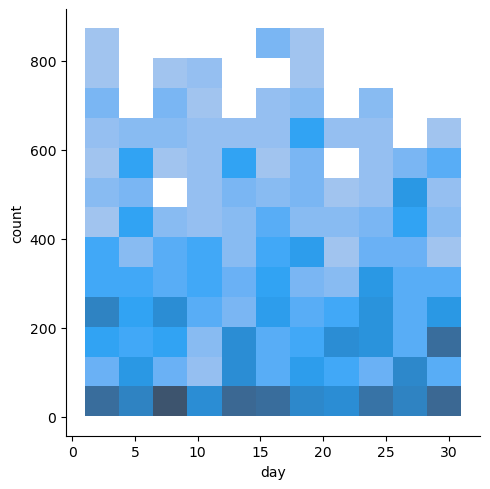

In [30]:
sns.displot(x='day',y='count',data=bike)

Calculate the confidence intervals for the mean of a feature

In [31]:
ip = df["weather"]
mean = ip.mean()

# Calculate the upper (0.975) and lower (0.025) quantiles of the data
lower_limit = np.quantile(ip, 0.025)
upper_limit = np.quantile(ip, 0.975)

# Print the calculated confidence interval
print(f"Confidence interval (95%): {lower_limit} - {upper_limit}")

Confidence interval (95%): 1.0 - 3.0


Use hypothesis testing to check if there is a significant different between temp and atemp features

In [32]:
from scipy.stats import ttest_ind
data_A = df["atemp"]
data_B =df["temp"]
test_statistic, pvalue = ttest_ind(data_A, data_B)
print (test_statistic, pvalue)
#since the p-value is = 0 (pvalue< 0.05)we will thereby reject the null hypothesis which state that there is no significant difference between the two variables or features. 3

38.550838713271254 0.0


Determine number of clusters defining weather data

/Users/christianaosatoamehraymond/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christianaosatoamehraymond/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christianaosatoamehraymond/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christianaosatoamehraymond/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

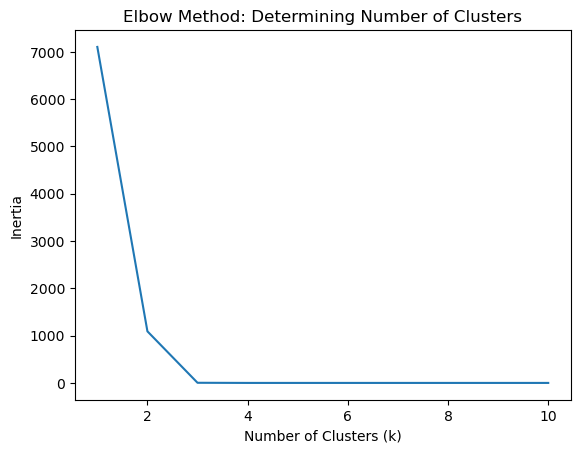

In [10]:
X = df[['weather']].values

# Perform K-means clustering for different numbers of clusters
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia (within-cluster sum of squares) for different numbers of clusters
plt.plot(k_values, inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Determining Number of Clusters')
plt.show()